# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls

In [3]:
print('Beginning Data Retrieval\n-----------------------------')

url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q='
weather = []
rcd=0
sets=1

for city in cities:
    rcd += 1
    print(f'Processing Record {rcd} of Set {sets} | {city}')
    
    if rcd == 50:
        rcd = 0
        sets += 1
    response = requests.get(url + city).json() 
    obj = {}
    try:
        obj['city']=city
        obj['lat']=response['coord']['lat']
        obj['lng']=response['coord']['lon']
        obj['temp']=response['main']['temp_max']
        obj['hum']=response['main']['humidity']
        obj['cloud']=response['clouds']['all']
        obj['wind']=response['wind']['speed']
        obj['country']=response['sys']['country']
        obj['date']= time.ctime(response['dt'])
        weather.append(obj)
    except:
        print('City not found. Skipping...')
        
print(f'-----------------------------\nData Retrieval Complete\n-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | necochea
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | tuatapere
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | hasanpur
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | cairns
Processing Record 10 of Set 1 | tuktoyaktuk
Processing Record 11 of Set 1 | hami
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | chuy
Processing Record 14 of Set 1 | saldanha
Processing Record 15 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 16 of Set 1 | hofn
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | sinnamary
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | ancud
Processing Record 21 of Set 1 | anadyr
Processing Record 22 of Set 1 | margate
Processing Record 23 of Set 1 

Processing Record 35 of Set 4 | guerrero negro
Processing Record 36 of Set 4 | huambo
Processing Record 37 of Set 4 | college
Processing Record 38 of Set 4 | maracaibo
Processing Record 39 of Set 4 | lagoa
Processing Record 40 of Set 4 | kruisfontein
Processing Record 41 of Set 4 | abapo
Processing Record 42 of Set 4 | georgetown
Processing Record 43 of Set 4 | clarence town
Processing Record 44 of Set 4 | nanortalik
Processing Record 45 of Set 4 | mehamn
Processing Record 46 of Set 4 | mumford
Processing Record 47 of Set 4 | saint-philippe
Processing Record 48 of Set 4 | new richmond
Processing Record 49 of Set 4 | oudtshoorn
Processing Record 50 of Set 4 | sitka
Processing Record 1 of Set 5 | barrow
Processing Record 2 of Set 5 | fougamou
Processing Record 3 of Set 5 | roslavl
Processing Record 4 of Set 5 | saharsa
Processing Record 5 of Set 5 | laguna
Processing Record 6 of Set 5 | arraial do cabo
Processing Record 7 of Set 5 | walvis bay
Processing Record 8 of Set 5 | gazojak
Proce

Processing Record 27 of Set 8 | iskitim
Processing Record 28 of Set 8 | jutai
Processing Record 29 of Set 8 | kaeo
Processing Record 30 of Set 8 | lokhvytsya
Processing Record 31 of Set 8 | kodinsk
Processing Record 32 of Set 8 | krasnyy yar
Processing Record 33 of Set 8 | lata
Processing Record 34 of Set 8 | miyako
Processing Record 35 of Set 8 | madimba
Processing Record 36 of Set 8 | naze
Processing Record 37 of Set 8 | maceio
Processing Record 38 of Set 8 | hokitika
Processing Record 39 of Set 8 | fort nelson
Processing Record 40 of Set 8 | hulan
Processing Record 41 of Set 8 | komsomolskiy
Processing Record 42 of Set 8 | miranorte
City not found. Skipping...
Processing Record 43 of Set 8 | ijaki
City not found. Skipping...
Processing Record 44 of Set 8 | jawhar
Processing Record 45 of Set 8 | vao
Processing Record 46 of Set 8 | praya
Processing Record 47 of Set 8 | verkhnyaya inta
Processing Record 48 of Set 8 | isangel
Processing Record 49 of Set 8 | palmer
Processing Record 50 o

Processing Record 18 of Set 12 | kudahuvadhoo
Processing Record 19 of Set 12 | lewistown
Processing Record 20 of Set 12 | faya
Processing Record 21 of Set 12 | gazli
Processing Record 22 of Set 12 | sulangan
Processing Record 23 of Set 12 | rincon
Processing Record 24 of Set 12 | aflu
City not found. Skipping...
Processing Record 25 of Set 12 | port loko
Processing Record 26 of Set 12 | coquimbo
Processing Record 27 of Set 12 | coari
Processing Record 28 of Set 12 | izumo
Processing Record 29 of Set 12 | borovoy
Processing Record 30 of Set 12 | gunjur
Processing Record 31 of Set 12 | taiyuan
Processing Record 32 of Set 12 | plerin
Processing Record 33 of Set 12 | turukhansk
Processing Record 34 of Set 12 | comodoro rivadavia
Processing Record 35 of Set 12 | collie
Processing Record 36 of Set 12 | vicuna
Processing Record 37 of Set 12 | tamazulapam
City not found. Skipping...
Processing Record 38 of Set 12 | hereford
Processing Record 39 of Set 12 | sarankhola
Processing Record 40 of Se

In [5]:
weather

[{'city': 'necochea',
  'lat': -38.5473,
  'lng': -58.7368,
  'temp': 59.04,
  'hum': 56,
  'cloud': 2,
  'wind': 16.69,
  'country': 'AR',
  'date': 'Thu Aug 19 14:00:10 2021'},
 {'city': 'mataura',
  'lat': -46.1927,
  'lng': 168.8643,
  'temp': 41.49,
  'hum': 98,
  'cloud': 100,
  'wind': 4.54,
  'country': 'NZ',
  'date': 'Thu Aug 19 14:00:55 2021'},
 {'city': 'puerto ayora',
  'lat': -0.7393,
  'lng': -90.3518,
  'temp': 74.55,
  'hum': 81,
  'cloud': 95,
  'wind': 8.99,
  'country': 'EC',
  'date': 'Thu Aug 19 14:02:27 2021'},
 {'city': 'tuatapere',
  'lat': -46.1333,
  'lng': 167.6833,
  'temp': 41.83,
  'hum': 85,
  'cloud': 87,
  'wind': 8.7,
  'country': 'NZ',
  'date': 'Thu Aug 19 14:03:40 2021'},
 {'city': 'cape town',
  'lat': -33.9258,
  'lng': 18.4232,
  'temp': 55.11,
  'hum': 81,
  'cloud': 20,
  'wind': 4,
  'country': 'ZA',
  'date': 'Thu Aug 19 13:58:12 2021'},
 {'city': 'east london',
  'lat': -33.0153,
  'lng': 27.9116,
  'temp': 56.62,
  'hum': 81,
  'cloud': 10

### Convert Raw Data to DataFrame

In [6]:
weather_data = pd.DataFrame(weather)
weather_data.to_csv("weather_data.csv", index=False, header=True)
weather_data.head()

,city,lat,lng,temp,hum,cloud,wind,country,date
0,necochea,-38.5473,-58.7368,59.04,56,2,16.69,AR,Thu Aug 19 14:00:10 2021
1,mataura,-46.1927,168.8643,41.49,98,100,4.54,NZ,Thu Aug 19 14:00:55 2021
2,puerto ayora,-0.7393,-90.3518,74.55,81,95,8.99,EC,Thu Aug 19 14:02:27 2021
3,tuatapere,-46.1333,167.6833,41.83,85,87,8.70,NZ,Thu Aug 19 14:03:40 2021
4,cape town,-33.9258,18.4232,55.11,81,20,4.00,ZA,Thu Aug 19 13:58:12 2021


In [7]:
weather_data.describe()

,lat,lng,temp,hum,cloud,wind
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,20.258346,21.983913,68.829507,71.804577,55.075704,7.795581
std,34.166522,91.288734,14.526198,21.173896,40.444613,5.341211
min,-54.800000,-179.166700,29.340000,12.000000,0.000000,0.000000
25%,-8.541925,-57.618125,56.875000,61.000000,11.000000,3.590000
50%,24.363350,27.052100,71.815000,77.000000,60.000000,6.700000
75%,50.677475,105.024975,79.117500,89.000000,99.000000,11.020000
max,78.218600,179.316700,104.680000,100.000000,100.000000,29.330000


## Plotting the Data

## Latitude vs. Temperature Plot

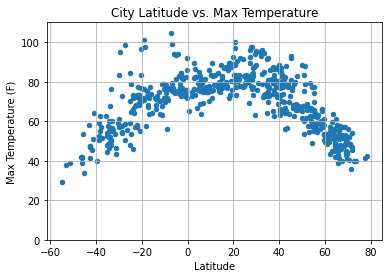

In [10]:
weather_data.plot.scatter('lat', 'temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')
plt.grid()
plt.ylim(0,110,20)
plt.savefig('Latitude vs Temperature')

## Latitude vs. Humidity Plot

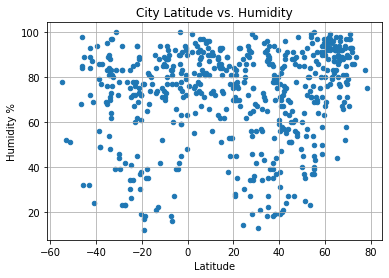

In [11]:
weather_data.plot.scatter('lat', 'hum')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs. Humidity')
plt.grid()
plt.savefig('Latitude vs Humidity')

## Latitude vs. Cloudiness Plot

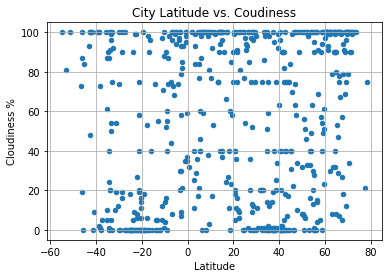

In [12]:
weather_data.plot.scatter('lat', 'cloud')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs. Coudiness')
plt.grid()
plt.savefig('Latitude vs Cloudiness')

## Latitude vs. Wind Speed Plot

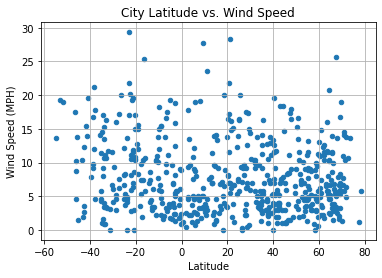

In [13]:
weather_data.plot.scatter('lat', 'wind')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('City Latitude vs. Wind Speed')
plt.grid()
plt.savefig('Latitude vs Wind Speed')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
north = weather_data['lat']>0
south = weather_data['lat']<0
n_hem = weather_data[north]
s_hem = weather_data[south]
len(n_hem)

385

The r-value is: -0.7563449282566201


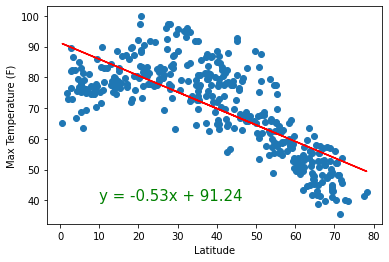

In [15]:
x_values_n = n_hem['lat']
y_values_ntemp = n_hem['temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_n, y_values_ntemp)
regress_values = x_values_n * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,40),fontsize=15,color="green")
plt.scatter(x_values_n,y_values_ntemp)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere Max Temp vs Latitude Linear Regression')
plt.plot(x_values_n,regress_values,"r-")
print(f"The r-value is: {rvalue}")
plt.savefig('Northern Hemisphere Max Temp vs Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7579559604136924


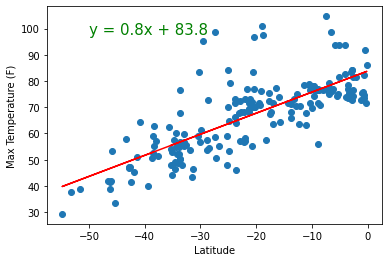

In [16]:
x_values_s = s_hem['lat']
y_values_stemp = s_hem['temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_s, y_values_stemp)
regress_values = x_values_s * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,98),fontsize=15,color="green")
plt.scatter(x_values_s,y_values_stemp)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere Max Temp vs Latitude Linear Regression')
plt.plot(x_values_s,regress_values,"r-")
print(f"The r-value is: {rvalue}")
plt.savefig('Southern Hemisphere Max Temp vs Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.09779532747525009


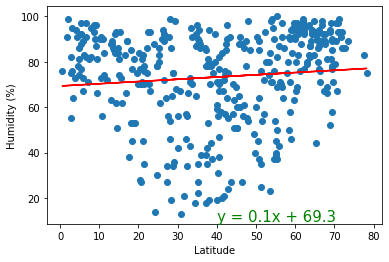

In [17]:
x_values_n = n_hem['lat']
y_values_nhum = n_hem['hum']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_n, y_values_nhum)
regress_values = x_values_n * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(40,10),fontsize=15,color="green")
plt.scatter(x_values_n,y_values_nhum)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Humidity vs Latitude Linear Regression')
plt.plot(x_values_n,regress_values,"r-")
print(f"The r-value is: {rvalue}")
plt.savefig('Northern Hemisphere Humidity vs Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02272168362634081


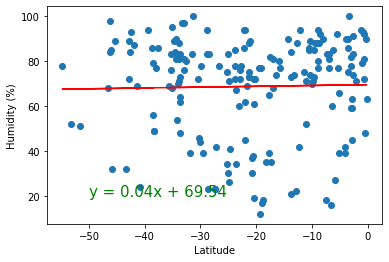

In [18]:
x_values_s = s_hem['lat']
y_values_shum = s_hem['hum']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_s, y_values_shum)
regress_values = x_values_s * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,20),fontsize=15,color="green")
plt.scatter(x_values_s,y_values_shum)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs Latitude Linear Regression')
plt.plot(x_values_s,regress_values,"r-")
print(f"The r-value is: {rvalue}")
plt.savefig('Southern Hemisphere - Humidity vs Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08696764392041922


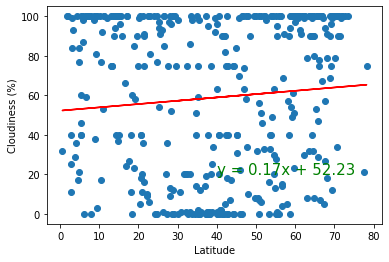

In [19]:
x_values_n = n_hem['lat']
y_values_ncloud = n_hem['cloud']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_n, y_values_ncloud)
regress_values = x_values_n * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(40,20),fontsize=15,color="green")
plt.scatter(x_values_n,y_values_ncloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs Latitude Linear Regression')
plt.plot(x_values_n,regress_values,"r-")
print(f"The r-value is: {rvalue}")
plt.savefig('Northern Hemisphere - Cloudiness vs Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03663752867613155


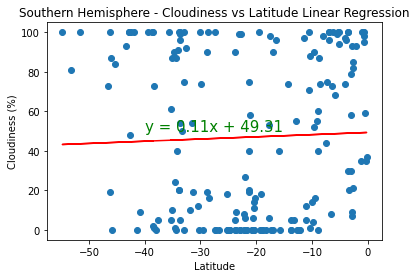

In [23]:
x_values_s = s_hem['lat']
y_values_scloud = s_hem['cloud']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_s, y_values_scloud)
regress_values = x_values_s * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-40,50),fontsize=15,color="green")
plt.scatter(x_values_s,y_values_scloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs Latitude Linear Regression')
plt.plot(x_values_s,regress_values,"r-")
print(f"The r-value is: {rvalue}")
plt.savefig('Southern Hemisphere - Cloudiness vs Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.002880954219621243


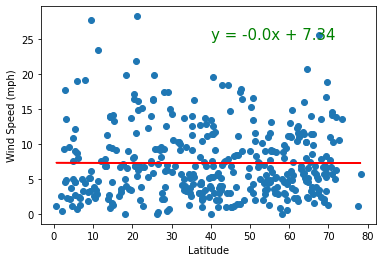

In [21]:
x_values_n = n_hem['lat']
y_values_nwind = n_hem['wind']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_n, y_values_nwind)
regress_values = x_values_n * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(40,25),fontsize=15,color="green")
plt.scatter(x_values_n,y_values_nwind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs Latitude Linear Regression')
plt.plot(x_values_n,regress_values,"r-")
print(f"The r-value is: {rvalue}")
plt.savefig('Northern Hemisphere - Wind Speed vs Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.19280725031025586


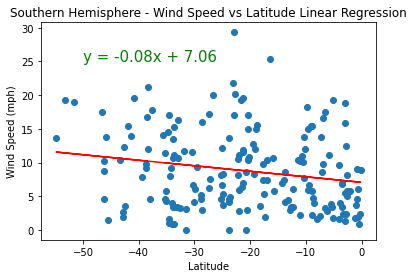

In [25]:
x_values_s = s_hem['lat']
y_values_swind = s_hem['wind']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_s, y_values_swind)
regress_values = x_values_s * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,25),fontsize=15,color="green")
plt.scatter(x_values_s,y_values_swind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs Latitude Linear Regression')
plt.plot(x_values_s,regress_values,"r-")
print(f"The r-value is: {rvalue}")
plt.savefig('Southern Hemisphere - Wind Speed vs Latitude Linear Regression')
plt.show()

3 Trends

1. Temperature is higher closer to the equator because sunlight hits a smaller surface area at a more direct angle.

2. Humidity is higher closer to the equator because warm air holds more moisture than cold air.

3. Cloudiness is unaffected by latitude.